In [1]:
import spotpy 
import datetime
import numpy as np
import matplotlib.pyplot as plt
from setup import SIRB_Setup, Results, ResultsDept
from sirb import SIRB
from misc import *
import pandas as pd
%matplotlib inline


In [2]:
setup = SIRB_Setup().model_dept()
setup.t1i = datetime.date(2010, 10, 24)
setup.t2f = datetime.date(2016, 8, 13) 
setup.t1f = setup.t2f 
setup.p.beta_h2h = 0.00001

models = ['norm', 'eisen', 'eisen-h2h', 'norm-h2h']
models = ['norm']
for model_str in models:
    model = SIRB(setup, model_str)
    result  = ResultsDept(model.run().y, setup)
    S = result.S.loc[setup.t2f].as_matrix()
    I = result.I.loc[setup.t2f].as_matrix()
    R = result.R.loc[setup.t2f].as_matrix()
    B = result.B.loc[setup.t2f].as_matrix()
    C = result.C.loc[setup.t2f].as_matrix()
    IC = np.concatenate((S, I, R, B, C))


>>> Simulation done in  0.9109013080596924


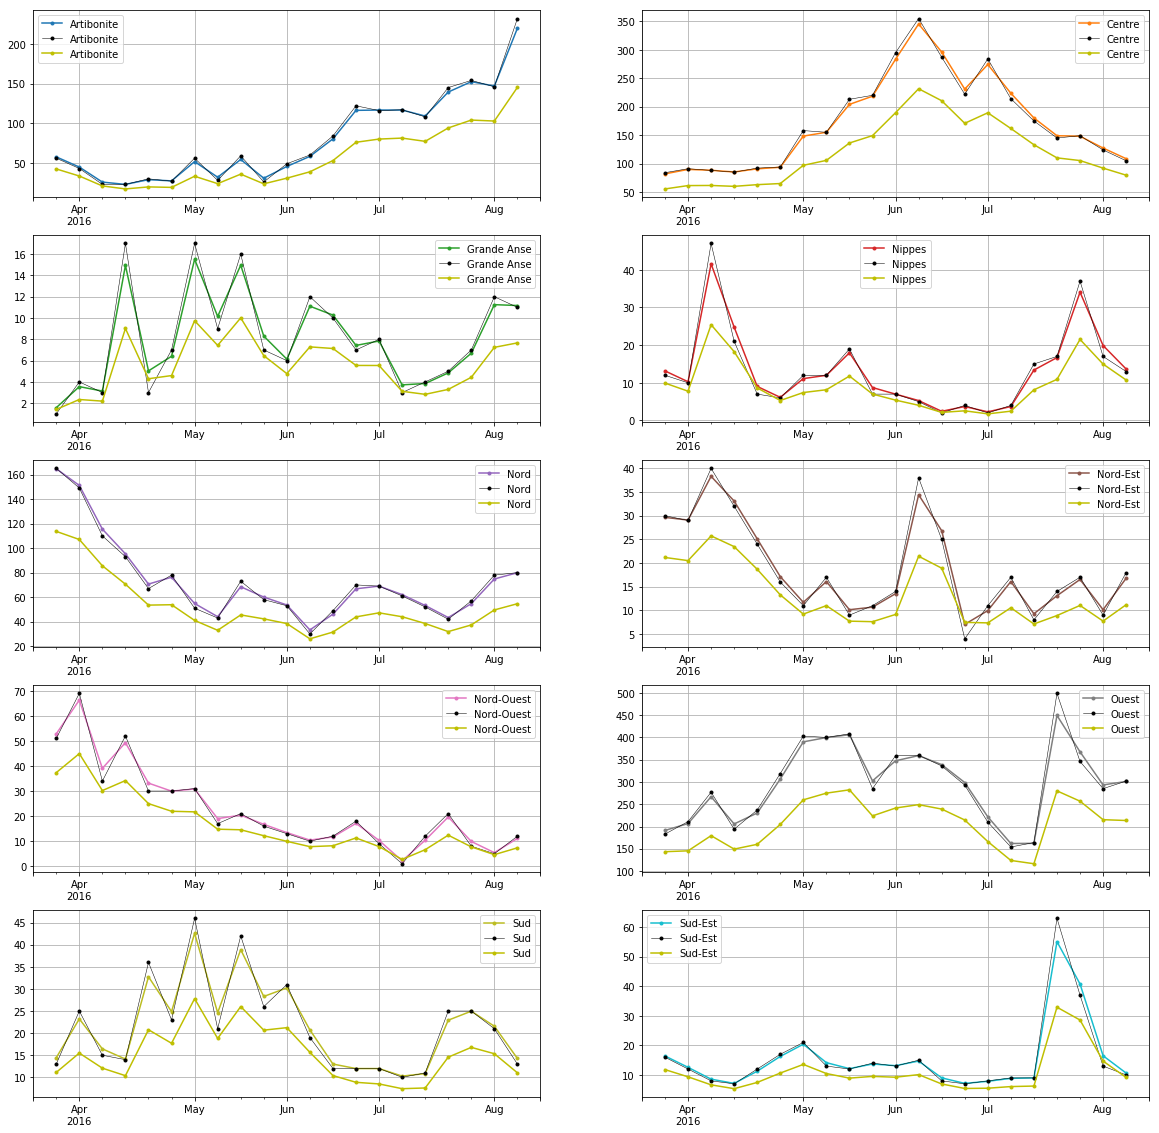

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(20,20), squeeze = True);
axes = axes.flatten()

result.I_adm1_w.iloc[0] = 0

date_compare1 = setup.t2f - datetime.timedelta(days=140)
date_compare2 = setup.t2f 
result.I_adm1_w[date_compare1:date_compare2].plot(subplots=True, ax=axes, style='.-');
setup.cases_dept[date_compare1:date_compare2].plot(subplots=True, style='k.-', ax=axes,linewidth=0.5);
result.I[date_compare1:date_compare2].plot(subplots=True, ax=axes, style='y.-');

for ax in axes:
    ax.grid()


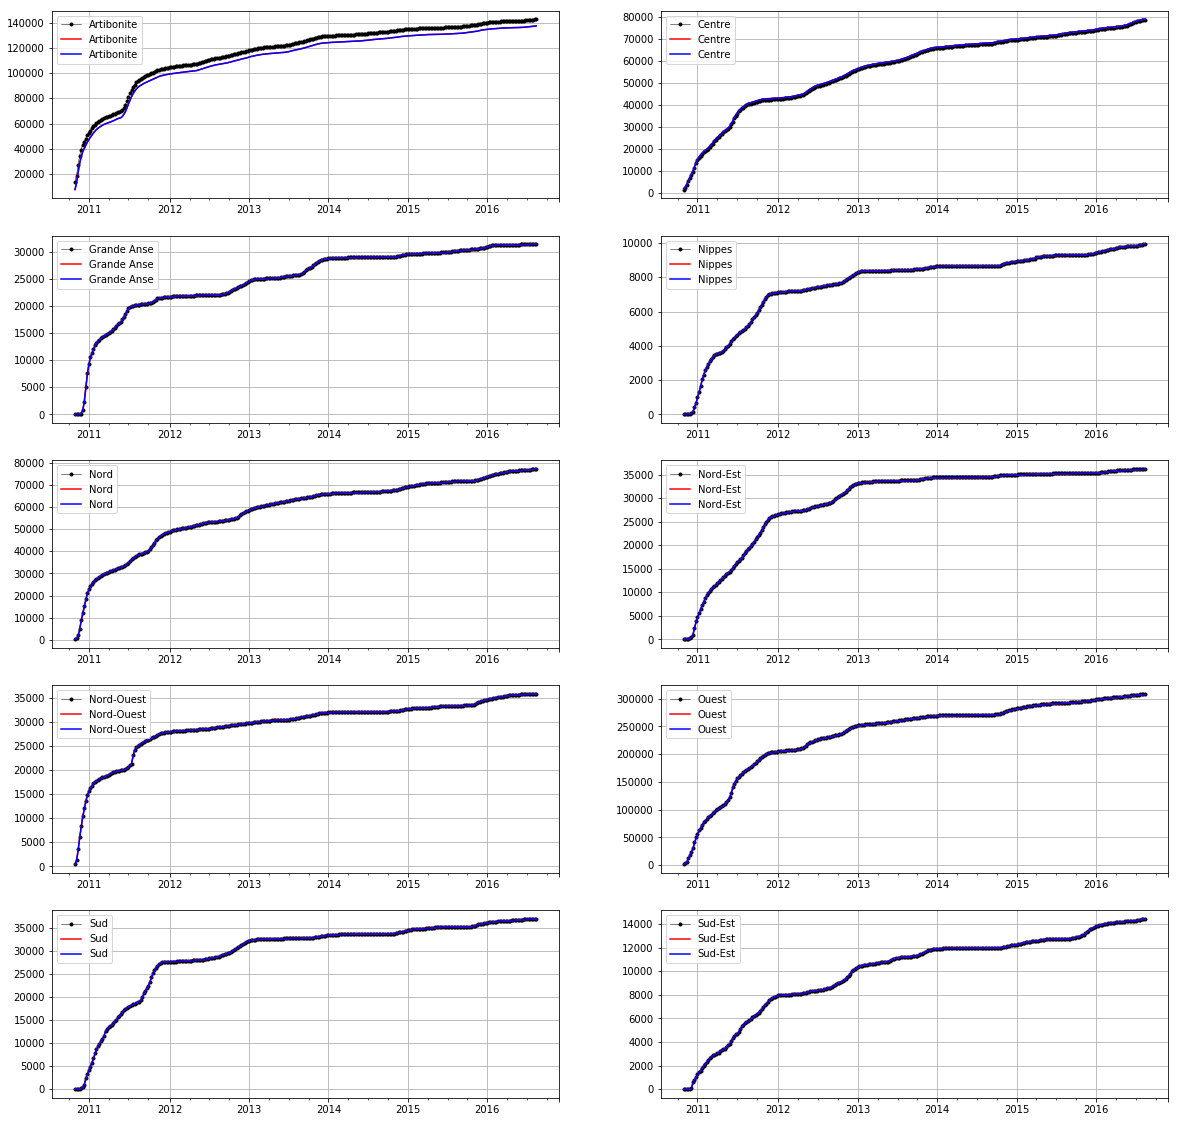

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(20,20), squeeze = True);
axes = axes.flatten()


setup.cases_dept.cumsum()[date_compare1:date_compare2].plot(subplots=True, style='k.-', ax=axes,linewidth=0.5);

result.C_adm1_w[date_compare1:date_compare2].plot(subplots=True, ax=axes, style='r-');
result.C[date_compare1:date_compare2].plot(subplots=True, ax=axes, style='b-');


for ax in axes:
    ax.grid()

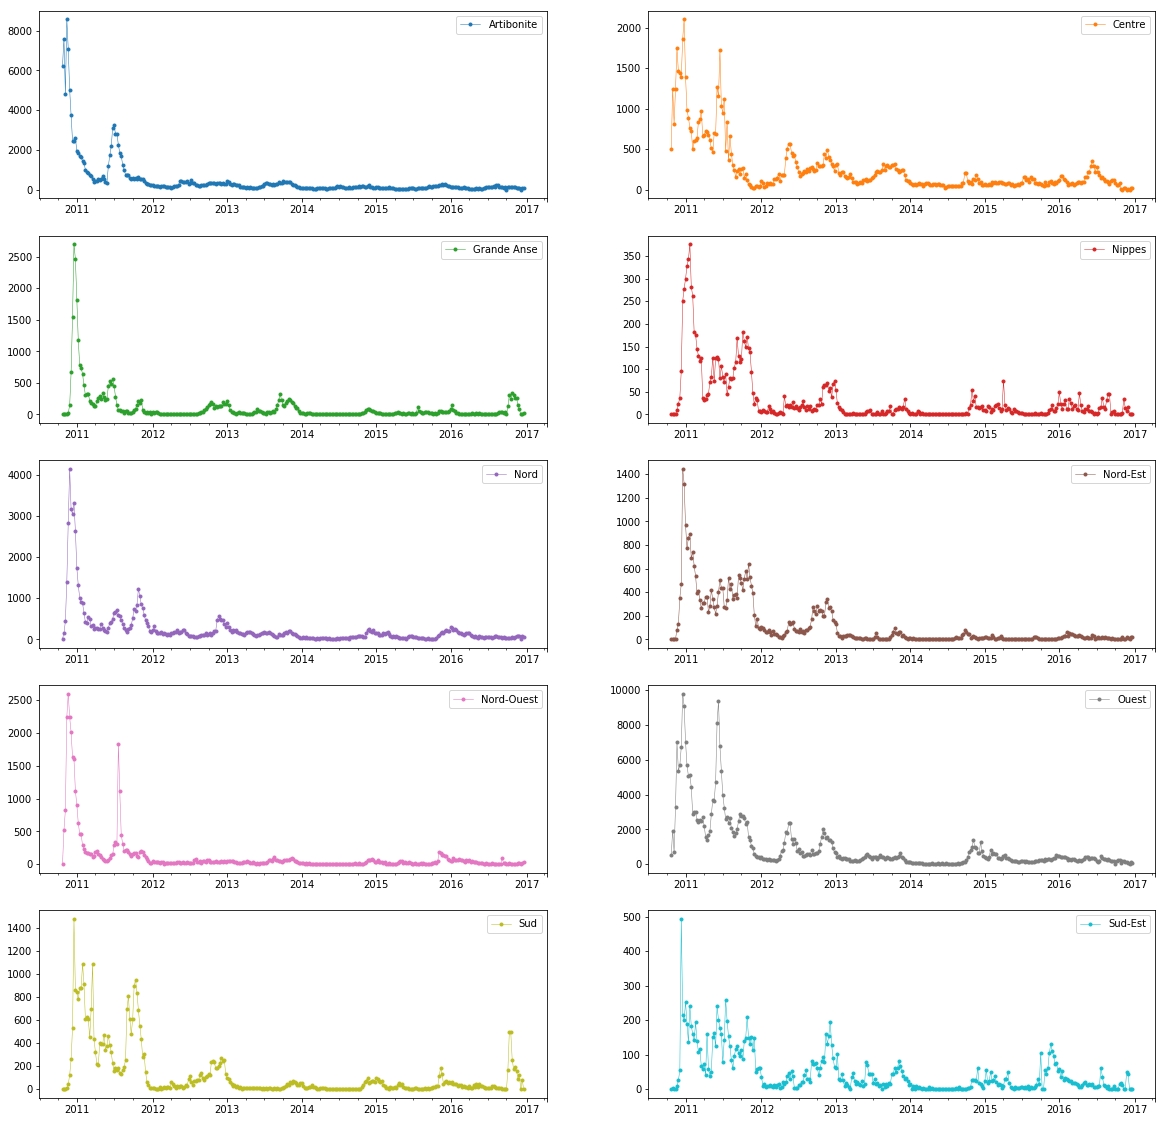

In [4]:
fig, axes = plt.subplots(5, 2, figsize=(20,20), squeeze = True);
axes = axes.flatten()


setup.cases_dept.plot(subplots=True, style='.-', ax=axes,linewidth=0.5);


In [12]:
print(result.I_adm1_w.loc[date_compare2])
setup.cases_dept.loc[date_compare2]

Artibonite     219.755876
Centre         108.582092
Grande Anse     11.173344
Nippes          13.662328
Nord            79.941937
Nord-Est        16.788177
Nord-Ouest      11.106270
Ouest          301.127101
Sud             14.275828
Sud-Est         10.633615
Name: 2016-08-13 00:00:00, dtype: float64


Artibonite     232.0
Centre         105.0
Grande Anse     11.0
Nippes          13.0
Nord            80.0
Nord-Est        18.0
Nord-Ouest      12.0
Ouest          302.0
Sud             13.0
Sud-Est         10.0
Name: 2016-08-13 00:00:00, dtype: float64

In [ ]:
model.run().y

In [14]:
result.I

,Artibonite,Centre,Grande Anse,Nippes,Nord,Nord-Est,Nord-Ouest,Ouest,Sud,Sud-Est
2010-10-24,1100.023812,1000.026540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-10-25,1879.470227,976.310944,0.000000,0.000000,18.737294,0.000000,66.917753,250.489383,0.000000,0.485260
2010-10-26,2515.020290,956.972446,0.000000,0.000000,34.015547,0.000000,121.481980,454.736552,0.000000,0.880938
2010-10-27,3033.236583,941.203010,0.000000,0.000000,46.473324,0.000000,165.973215,621.278125,0.000000,1.203571
2010-10-28,3455.778177,928.343767,0.000000,0.000000,56.631305,0.000000,202.250987,757.074772,0.000000,1.466644
2010-10-29,3800.305921,917.857480,0.000000,0.000000,64.914045,0.000000,231.831543,867.802186,0.000000,1.681151
2010-10-30,4081.220506,909.306084,0.000000,0.000000,71.667729,0.000000,255.951223,958.088290,0.000000,1.856059
2010-10-31,4305.194519,901.536542,0.000000,0.001765,77.709449,0.000000,276.169829,1029.463045,0.000000,1.995612
2010-11-01,4145.856496,841.521110,0.000000,0.122227,118.709275,0.000000,329.867432,936.329466,0.000000,1.902657
2010-11-02,4005.264087,790.910764,0.000000,0.224162,153.264908,0.000000,374.812039,855.670704,0.000000,1.820416


IndexError: index 10 is out of bounds for axis 0 with size 10

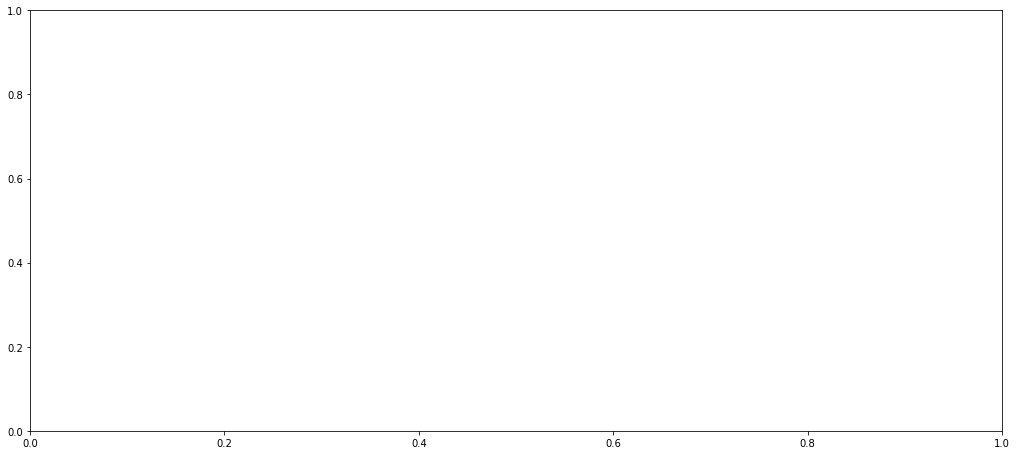

In [18]:
from matplotlib.widgets import Slider
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn
%matplotlib qt

def plot_on_ws(geo, data):
    im = np.empty_like(geo.ws_grid, dtype=float)
    im[:] = -999
    for i, ws in enumerate(geo.ws_list):
        im[geo.ws_grid == ws] = data[i]
        
    return np.ma.masked_where(im == -999, im)

#cmap = mpl.cm.get_cmap()
cmap = mpl.cm.nipy_spectral
#cmap.set_bad(color='blue')
cmap.set_bad(color=(0,.1,.3))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
fig.set_facecolor('white')


fig.subplots_adjust(left=0, bottom=0.15)
canvas = ax.imshow(plot_on_ws(model.s.geo, model.beta_force[0,:]), cmap=cmap)
canvas.set_clim([0, 10])
cbar = fig.colorbar(canvas)

axmin = fig.add_axes([0.1, 0.1, 0.65, 0.03])

slider = Slider(axmin, 'Time', 0, model.t_force, valinit=5, valfmt='%d')
#fig.tight_layout()
def update(val):
    nw = plot_on_ws(model.s.geo, model.beta_force[int(slider.val),:])
    canvas.set_data(nw)
    fig.canvas.draw()
    ax.set_title((model.s.t1i+datetime.timedelta(int(slider.val))).strftime('%Y-%m-%d')) #+ ' ' + \
                 #str(min(model.beta_force[int(slider.val),:])) + ' ' + \
                 #str(max(model.beta_force[int(slider.val),:])))
    
    #canvas.set_clim([nw.min(), max(nw.max(),0)])
    canvas.set_clim([-2, 8])
    
slider.on_changed(update)

#anim = FuncAnimation(fig, update, frames=np.arange(0, 10),interval=200)
#anim.save('betaforce.gif', dpi=80, writer='imagemagick')

plt.show()

In [19]:
plt.plot(np.arange(model.t_force), model.beta_force);


In [33]:
result.I_adm1_w[setup.t1f:date_compare]

,Artibonite,Centre,Grande Anse,Nippes,Nord,Nord-Est,Nord-Ouest,Ouest,Sud,Sud-Est
2016-08-13,219.755876,108.582092,11.173344,13.662328,79.941937,16.788177,11.10627,301.127101,14.275828,10.633615


In [11]:
result.I

,Artibonite,Centre,Grande Anse,Nippes,Nord,Nord-Est,Nord-Ouest,Ouest,Sud,Sud-Est
2010-10-24,1100.023812,1000.026540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-10-25,1879.470227,976.310944,0.000000,0.000000,18.737294,0.000000,66.917753,250.489383,0.000000,0.485260
2010-10-26,2515.020290,956.972446,0.000000,0.000000,34.015547,0.000000,121.481980,454.736552,0.000000,0.880938
2010-10-27,3033.236583,941.203010,0.000000,0.000000,46.473324,0.000000,165.973215,621.278125,0.000000,1.203571
2010-10-28,3455.778177,928.343767,0.000000,0.000000,56.631305,0.000000,202.250987,757.074772,0.000000,1.466644
2010-10-29,3800.305921,917.857480,0.000000,0.000000,64.914045,0.000000,231.831543,867.802186,0.000000,1.681151
2010-10-30,4081.220506,909.306084,0.000000,0.000000,71.667729,0.000000,255.951223,958.088290,0.000000,1.856059
2010-10-31,4305.194519,901.536542,0.000000,0.001765,77.709449,0.000000,276.169829,1029.463045,0.000000,1.995612
2010-11-01,4145.856496,841.521110,0.000000,0.122227,118.709275,0.000000,329.867432,936.329466,0.000000,1.902657
2010-11-02,4005.264087,790.910764,0.000000,0.224162,153.264908,0.000000,374.812039,855.670704,0.000000,1.820416
